## Simulation of roll decay


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from rolldecay.equations_lambdify import calculate_acceleration, calculate_velocity
import inspect

In [3]:
from numpy import abs

In [26]:
def roll_decay_time_step(states,t, d, omega0, zeta):
    
    # states:
    # [phi,phi1d]
        
    phi_old = states[0]
    p_old = states[1]
        
    phi1d = calculate_velocity(p_old)
    phi2d = calculate_acceleration(d=d, omega0=omega0, p_old=p_old, phi_old=phi_old, zeta=zeta)
        
    d_states_dt = np.array([phi1d,phi2d])
    
    return d_states_dt

In [45]:
phi0 = np.deg2rad(2)
phi1d0 = 0

states0 = [phi0,phi1d0]
d = 0.076
T0 = 20
omega0 = 2*np.pi/T0
zeta = 0.044

roll_decay_time_step(states=states0,t=0, d=d, omega0=omega0, zeta=zeta)

array([ 0.        , -0.00344514])

In [46]:
N = 1000
t = np.linspace(0,120,N)
states = odeint(func = roll_decay_time_step,y0 = states0,t = t,args=(d, omega0, zeta))

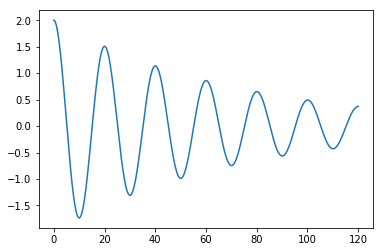

In [47]:
fig,ax = plt.subplots()
ax.plot(t,np.rad2deg(states[:,0]))

In [43]:
print(inspect.getsource(calculate_acceleration))


def _lambdifygenerated(d, omega0, p_old, phi_old, zeta):
    return (-d*p_old*abs(p_old) - omega0**2*phi_old - 2*omega0*p_old*zeta)



In [44]:
print(inspect.getsource(calculate_velocity))

def _lambdifygenerated(p_old):
    return (p_old)

